# Rohan Pawar 20BAI1201

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1- Read Data and Data Preprocessing

In [2]:
df= pd.read_csv('drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [5]:
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [6]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


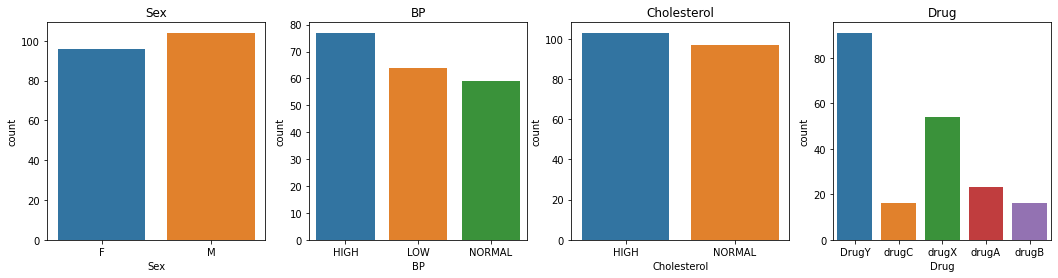

In [8]:
fig, ax = plt.subplots(1,4,figsize=(18,4))

cat_cols = ['Sex', 'BP', 'Cholesterol', 'Drug']

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=df[col], ax=ax[i])
    ax[i].set_title(col)


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x=df.iloc[:,0:5]
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [11]:
y=df['Drug']
y.head()

0    DrugY
1    drugC
2    drugC
3    drugX
4    DrugY
Name: Drug, dtype: object

In [12]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=12)

In [13]:
x.shape, y.shape

((200, 5), (200,))

In [14]:
y.unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [15]:
xtrain.shape, xtest.shape

((160, 5), (40, 5))

In [16]:
ytrain.shape, ytest.shape

((160,), (40,))

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ytrain = le.fit_transform(ytrain)
ytest=le.transform(ytest)
xtest['Sex'] = le.fit_transform(xtest['Sex'])
xtest['BP'] = le.fit_transform(xtest['BP'])
xtest['Cholesterol'] = le.fit_transform(xtest['Cholesterol'])

### Training Data

In [18]:
xtrain['Sex'] = le.fit_transform(xtrain['Sex'])
xtrain['BP'] = le.fit_transform(xtrain['BP'])
xtrain['Cholesterol'] = le.fit_transform(xtrain['Cholesterol'])
xtrain['Sex'].head(2)

77    0
47    1
Name: Sex, dtype: int32

In [19]:
xtrain['BP'].head(5)

77    0
47    1
94    1
14    2
41    0
Name: BP, dtype: int32

In [20]:
xtrain['Cholesterol'].head(5)

77    1
47    0
94    0
14    0
41    1
Name: Cholesterol, dtype: int32

# Building the Model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [22]:
model = Sequential()
# Adding input layer to the model
model.add(Dense(5,activation='relu',name="layer-1"))
# Adding the 1st hidden layer to the model
model.add(Dense(64,activation='relu',name="layer-2"))
# Adding the 2nd hidden layer to the model
model.add(Dense(32,activation='relu',name="layer-3"))
# Adding the 3rd hidden layer to the model
model.add(Dense(16,activation='relu',name="layer-4"))
#npo is number of possible outcomes
npo =  len(set(df["Drug"]))
model.add(Dense(5,activation='linear'))


In [23]:
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [24]:
model.fit(xtrain,ytrain,epochs=100,batch_size=2)

Epoch 1/100
80/80 [==============================] - 0s 738us/step - loss: 4.9368 - accuracy: 0.1000
Epoch 2/100
80/80 [==============================] - 0s 779us/step - loss: 3.4091 - accuracy: 0.0750
Epoch 3/100
80/80 [==============================] - 0s 773us/step - loss: 3.0907 - accuracy: 0.0875
Epoch 4/100
80/80 [==============================] - 0s 754us/step - loss: 2.8865 - accuracy: 0.1312
Epoch 5/100
80/80 [==============================] - 0s 763us/step - loss: 2.7850 - accuracy: 0.1250
Epoch 6/100
80/80 [==============================] - 0s 852us/step - loss: 2.7920 - accuracy: 0.1312
Epoch 7/100
80/80 [==============================] - 0s 773us/step - loss: 2.8039 - accuracy: 0.1562
Epoch 8/100
80/80 [==============================] - 0s 763us/step - loss: 2.7662 - accuracy: 0.1562
Epoch 9/100
80/80 [==============================] - 0s 760us/step - loss: 2.6508 - accuracy: 0.1437
Epoch 10/100
80/80 [==============================] - 0s 833us/step - loss: 2.5931 - accura

80/80 [==============================] - 0s 815us/step - loss: 0.5073 - accuracy: 0.2750
Epoch 82/100
80/80 [==============================] - 0s 786us/step - loss: 0.5084 - accuracy: 0.2188
Epoch 83/100
80/80 [==============================] - 0s 721us/step - loss: 0.6001 - accuracy: 0.2438
Epoch 84/100
80/80 [==============================] - 0s 682us/step - loss: 0.5470 - accuracy: 0.2062
Epoch 85/100
80/80 [==============================] - 0s 683us/step - loss: 0.5851 - accuracy: 0.1625
Epoch 86/100
80/80 [==============================] - 0s 702us/step - loss: 0.5674 - accuracy: 0.3125
Epoch 87/100
80/80 [==============================] - 0s 765us/step - loss: 0.7036 - accuracy: 0.2250
Epoch 88/100
80/80 [==============================] - 0s 842us/step - loss: 0.5567 - accuracy: 0.2000
Epoch 89/100
80/80 [==============================] - 0s 787us/step - loss: 0.5675 - accuracy: 0.2125
Epoch 90/100
80/80 [==============================] - 0s 894us/step - loss: 0.4917 - accuracy: 

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer-1 (Dense)             (2, 5)                    30        
                                                                 
 layer-2 (Dense)             (2, 64)                   384       
                                                                 
 layer-3 (Dense)             (2, 32)                   2080      
                                                                 
 layer-4 (Dense)             (2, 16)                   528       
                                                                 
 dense (Dense)               (2, 5)                    85        
                                                                 
Total params: 3,107
Trainable params: 3,107
Non-trainable params: 0
_________________________________________________________________


### Random Data Generation and Testing

In [29]:
data_random = np.random.rand(1,5)
data_random

array([[0.69948656, 0.08919971, 0.92078407, 0.64117201, 0.68054784]])

In [30]:
pred = model.predict(data_random)
pred

1/1 [==============================] - 0s 48ms/step


array([[2.9046881, 2.8611581, 2.8768566, 2.9083588, 2.814039 ]],
      dtype=float32)

In [32]:
prediction = np.argmax(pred)
print(prediction)

3
